# Analyzing chips products' sales

## - Cleaning Data

#### Import all the required modules

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib
from matplotlib import pyplot as plt

#### Load the 2 files to pandas as dataframes  
#### Note: Transaction Data was converted to CSV before loading

In [2]:
transactional = pd.read_csv("resources/QVI/QVI_transaction_data.csv")
purchase_behaviour = pd.read_csv("resources/QVI/QVI_purchase_behaviour.csv")


#### Check transaction data

In [3]:
transactional.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


#### Check behaviour data

In [4]:
purchase_behaviour.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


#### Merge the two dataframes based on Loyality card number

In [5]:
merged_data = pd.merge(transactional,purchase_behaviour, on=["LYLTY_CARD_NBR"],how="left")

#### Check the first and last 5 rows after merging

In [6]:
merged_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [7]:
merged_data.tail()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium
264835,43365,272,272380,270189,74,Tostitos Splash Of Lime 175g,2,8.8,YOUNG SINGLES/COUPLES,Premium


#### Check columns data types

In [8]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264836 non-null  int64  
 1   STORE_NBR         264836 non-null  int64  
 2   LYLTY_CARD_NBR    264836 non-null  int64  
 3   TXN_ID            264836 non-null  int64  
 4   PROD_NBR          264836 non-null  int64  
 5   PROD_NAME         264836 non-null  object 
 6   PROD_QTY          264836 non-null  int64  
 7   TOT_SALES         264836 non-null  float64
 8   LIFESTAGE         264836 non-null  object 
 9   PREMIUM_CUSTOMER  264836 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 22.2+ MB


#### Check duplicate rows

In [9]:
duplicated_rows = merged_data[merged_data.duplicated() == True]
duplicated_rows

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
124845,43374,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0,OLDER SINGLES/COUPLES,Premium


#### Check the duplicated rows based on Date and Card Number
#### Then remove duplicates and shows data after dropping duplicates

In [10]:
merged_data[(merged_data["DATE"] == 43374) & (merged_data["LYLTY_CARD_NBR"] == 107024)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
124843,43374,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0,OLDER SINGLES/COUPLES,Premium
124844,43374,107,107024,108462,18,Cheetos Chs & Bacon Balls 190g,2,6.6,OLDER SINGLES/COUPLES,Premium
124845,43374,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0,OLDER SINGLES/COUPLES,Premium


In [11]:
merged_data.drop_duplicates(inplace=True)
merged_data[(merged_data["DATE"] == 43374) & (merged_data["LYLTY_CARD_NBR"] == 107024)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
124843,43374,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0,OLDER SINGLES/COUPLES,Premium
124844,43374,107,107024,108462,18,Cheetos Chs & Bacon Balls 190g,2,6.6,OLDER SINGLES/COUPLES,Premium


#### Update the date format to be readable
#### Then check the dataframe info and the first 5 rows

In [12]:
merged_data['DATE'] = pd.TimedeltaIndex(merged_data['DATE'], unit='d') + dt.datetime(1900,1,1)


In [13]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264835 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264835 non-null  datetime64[ns]
 1   STORE_NBR         264835 non-null  int64         
 2   LYLTY_CARD_NBR    264835 non-null  int64         
 3   TXN_ID            264835 non-null  int64         
 4   PROD_NBR          264835 non-null  int64         
 5   PROD_NAME         264835 non-null  object        
 6   PROD_QTY          264835 non-null  int64         
 7   TOT_SALES         264835 non-null  float64       
 8   LIFESTAGE         264835 non-null  object        
 9   PREMIUM_CUSTOMER  264835 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 22.2+ MB


In [14]:
merged_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


#### Extract the weight from the product name and add a new column called "WEIGHT" and then remove the weight from the product name

In [15]:
merged_data["WEIGHT"] = merged_data.PROD_NAME.str.extract('(\d+)')
merged_data["WEIGHT"].value_counts()

175    66389
150    43131
134    25102
110    22387
170    19983
165    15297
300    15166
330    12540
380     6418
270     6285
210     6272
200     4473
135     3257
250     3169
90      3008
190     2995
160     2970
220     1564
70      1507
180     1468
125     1454
Name: WEIGHT, dtype: int64

In [16]:
merged_data[["PROD_NAME","WEIGHT"]]

,PROD_NAME,WEIGHT
0,Natural Chip Compny SeaSalt175g,175
1,CCs Nacho Cheese 175g,175
2,Smiths Crinkle Cut Chips Chicken 170g,170
3,Smiths Chip Thinly S/Cream&Onion 175g,175
4,Kettle Tortilla ChpsHny&Jlpno Chili 150g,150
...,...,...
264831,Kettle Sweet Chilli And Sour Cream 175g,175
264832,Tostitos Splash Of Lime 175g,175
264833,Doritos Mexicana 170g,170
264834,Doritos Corn Chip Mexican Jalapeno 150g,150


#### Get the first word of the brand names by extracting the first word of the product name and add them to a new column called "BRAND_NAME"

In [17]:
merged_data["BRAND_NAME"] = merged_data["PROD_NAME"].str.split(" ").str[0]
merged_data["BRAND_NAME"]

0          Natural
1              CCs
2           Smiths
3           Smiths
4           Kettle
            ...   
264831      Kettle
264832    Tostitos
264833     Doritos
264834     Doritos
264835    Tostitos
Name: BRAND_NAME, Length: 264835, dtype: object

#### Check value counts of distinct brand names

In [18]:
merged_data["BRAND_NAME"].value_counts()

Kettle        41288
Smiths        28859
Pringles      25102
Doritos       24962
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Old            9324
Tyrrells       6442
Grain          6272
Natural        6050
Red            5885
Cheezels       4603
CCs            4551
Woolworths     4437
Dorito         3185
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: BRAND_NAME, dtype: int64

#### Add brand names to an array

In [19]:
brand_name_list = merged_data.BRAND_NAME.unique()
brand_name_list

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Old', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'Woolworths', 'French', 'RRD', 'Tostitos',
       'Cheetos', 'Snbts', 'Sunbites'], dtype=object)

#### Get the first product for each brand name to check the correct brand name
#### Note: Some brand names are with one word and some with more than one word and there are duplicate brand names with different letters

In [20]:
for x in brand_name_list:
    brand_name_check = merged_data[merged_data["PROD_NAME"].str.startswith(x)]
    print(brand_name_check[["PROD_NAME"]].iloc[0,0])

Natural Chip        Compny SeaSalt175g
CCs Nacho Cheese    175g
Smiths Crinkle Cut  Chips Chicken 170g
Kettle Tortilla ChpsHny&Jlpno Chili 150g
Old El Paso Salsa   Dip Tomato Mild 300g
Grain Waves         Sweet Chilli 210g
Doritos Corn Chip Mexican Jalapeno 150g
Twisties Cheese     270g
WW Crinkle Cut      Chicken 175g
Thins Chips Light&  Tangy 175g
Burger Rings 220g
NCC Sour Cream &    Garden Chives 175g
Cheezels Cheese Box 125g
Infzns Crn Crnchers Tangy Gcamole 110g
Red Rock Deli Thai  Chilli&Lime 150g
Pringles Sthrn FriedChicken 134g
Doritos Corn Chip Mexican Jalapeno 150g
Infuzions Thai SweetChili PotatoMix 110g
Smiths Crinkle Cut  Chips Chicken 170g
GrnWves Plus Btroot & Chilli Jam 180g
Tyrrells Crisps     Lightly Salted 165g
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g
Woolworths Mild     Salsa 300g
French Fries Potato Chips 175g
RRD Chilli&         Coconut 150g
Tostitos Lightly    Salted 175g
Cheetos Puffs 165g
Snbts Whlgrn Crisps Cheddr&Mstrd 90g
Sunbites Whlegrn    Crisps Frch/Oni

#### Replace the current brand names stored with the correct brand names extracted from the previous list

In [21]:
for x in [["Old","Old El Paso"],["Snbts","Sunbites"],["GrnWves","Grain Waves"],["Smith","Smiths"],["Dorito","Doritos"],["RRD","Red Rock Deli"],["Red","Red Rock Deli"],["Infzns","Infuzions"],["French","French Fries"]]:
    merged_data["BRAND_NAME"] = merged_data["BRAND_NAME"].replace(x[0],x[1])

#### Check the distinct brand names after replacement

In [22]:
brand_name_list = merged_data.BRAND_NAME.unique()
brand_name_list

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Old El Paso', 'Grain',
       'Doritos', 'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels',
       'Infuzions', 'Red Rock Deli', 'Pringles', 'Grain Waves',
       'Tyrrells', 'Cobs', 'Woolworths', 'French Fries', 'Tostitos',
       'Cheetos', 'Sunbites'], dtype=object)

#### Check the the top rows of the dataframe after modification

In [23]:
merged_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,WEIGHT,BRAND_NAME
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,175,Natural
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175,CCs
2,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170,Smiths
3,2018-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,175,Smiths
4,2018-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,150,Kettle


#### Export the dataframe to CSV file

In [24]:
merged_data.to_csv("merged_data.csv")

## - Analyzing the data

#### Basic statistics about the dataframe grouped by Brand name

In [25]:
merged_data[["BRAND_NAME","TOT_SALES","PROD_QTY"]].groupby("BRAND_NAME").agg({"TOT_SALES":['count','min','max','mean'],"PROD_QTY":['sum','min','max','mean']})

TOT_SALES                       PROD_QTY                   
                  count  min    max      mean      sum min  max      mean
BRAND_NAME                                                               
Burger             1564  2.3   11.5  4.367647     2970   1    5  1.898977
CCs                4551  2.1   10.5  3.972512     8609   1    5  1.891672
Cheetos            2927  2.8   16.5  5.768534     5530   1    5  1.889306
Cheezels           4603  2.1   28.5  8.696481     8747   1    5  1.900282
Cobs               9693  3.8   19.0  7.280491    18571   1    5  1.915919
Doritos           28147  2.6  650.0  8.593843    54216   1  200  1.926173
French Fries       1418  3.0    9.0  5.591678     2643   1    3  1.863893
Grain              6272  3.6   18.0  6.863648    11962   1    5  1.907207
Grain Waves        1468  3.1   15.5  5.836785     2764   1    5  1.882834
Infuzions         14201  2.4   19.0  6.974692    27119   1    5  1.909654
Kettle            41288  4.2   27.0  9.451652    79051   1    5  1.914624
NCC                1419  3.0   15.0  5.670190     2682   1    5  1.890063
Natural            6050  3.0   15.0  5.664793    11424   1    5  1.888264
Old El Paso        9324  5.1   25.5  9.736712    17805   1    5  1.909588
Pringles          25102  3.7   18.5  7.077344    48019   1    5  1.912955
Red Rock Deli     17779  2.7   15.0  5.345970    33646   1    5  1.892457
Smiths            31822  2.6   29.5  7.059713    60337   1    5  1.896078
Sunbites           3008  1.7    8.5  3.216888     5692   1    5  1.892287
Thins             14075  3.3   16.5  6.312789    26929   1    5  1.913250
Tostitos           9471  4.4   22.0  8.424623    18134   1    5  1.914687
Twisties           9454  4.3   23.0  8.623027    18118   1    5  1.916437
Tyrrells           6442  4.2   21.0  8.017293    12298   1    5  1.909034
WW                10320  1.7    9.5  3.477665    19461   1    5  1.885756
Woolworths         4437  1.5    9.0  3.032252     8395   1    5  1.892044

#### We notice that the brand "Doritos" was purchased 200 times in one transaction, we need to find out if it is an outlier

In [26]:
merged_data[merged_data["BRAND_NAME"] == "Doritos"].sort_values(by=["PROD_QTY"],ascending=False).head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,WEIGHT,BRAND_NAME
69762,2018-08-21,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.00,OLDER FAMILIES,Premium,380,Doritos
69763,2019-05-22,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.00,OLDER FAMILIES,Premium,380,Doritos
32498,2018-08-20,133,133234,137558,41,Doritos Salsa Mild 300g,5,13.00,OLDER FAMILIES,Budget,300,Doritos
171808,2019-05-19,20,20080,17039,4,Dorito Corn Chp Supreme 380g,5,16.25,RETIREES,Premium,380,Doritos
55485,2018-08-16,155,155087,155558,101,Doritos Salsa Medium 300g,5,13.00,OLDER FAMILIES,Mainstream,300,Doritos
55531,2018-08-20,180,180094,181582,42,Doritos Corn Chip Mexican Jalapeno 150g,5,19.50,OLDER FAMILIES,Mainstream,150,Doritos
69450,2018-08-21,17,17331,15114,93,Doritos Corn Chip Southern Chicken 150g,5,19.50,OLDER FAMILIES,Premium,150,Doritos
135445,2018-08-16,154,154199,154279,20,Doritos Cheese Supreme 330g,5,28.50,RETIREES,Budget,330,Doritos
185199,2019-05-18,123,123320,127413,51,Doritos Mexicana 170g,5,22.00,YOUNG FAMILIES,Budget,170,Doritos
55559,2018-08-17,191,191024,191883,41,Doritos Salsa Mild 300g,5,13.00,OLDER FAMILIES,Mainstream,300,Doritos


#### We find out that this transaction occured twice by the same customer at the same store in different months
#### It means that these 2 transactions are outliers so we need to remove them

In [27]:
merged_data.drop([69762,69763],inplace=True)

#### Check the data after removing the outliers

In [28]:
brand_names_stats = merged_data[["BRAND_NAME","TOT_SALES","PROD_QTY"]].groupby("BRAND_NAME").agg({"TOT_SALES":['sum','count','min','max','mean'],"PROD_QTY":['sum','min','max','mean']})
brand_names_stats

TOT_SALES                             PROD_QTY                  
                    sum  count  min   max      mean      sum min max      mean
BRAND_NAME                                                                    
Burger           6831.0   1564  2.3  11.5  4.367647     2970   1   5  1.898977
CCs             18078.9   4551  2.1  10.5  3.972512     8609   1   5  1.891672
Cheetos         16884.5   2927  2.8  16.5  5.768534     5530   1   5  1.889306
Cheezels        40029.9   4603  2.1  28.5  8.696481     8747   1   5  1.900282
Cobs            70569.8   9693  3.8  19.0  7.280491    18571   1   5  1.915919
Doritos        240590.9  28145  2.6  28.5  8.548264    53816   1   5  1.912098
French Fries     7929.0   1418  3.0   9.0  5.591678     2643   1   3  1.863893
Grain           43048.8   6272  3.6  18.0  6.863648    11962   1   5  1.907207
Grain Waves      8568.4   1468  3.1  15.5  5.836785     2764   1   5  1.882834
Infuzions       99047.6  14201  2.4  19.0  6.974692    27119   1   5  1.909654
Kettle         390239.8  41288  4.2  27.0  9.451652    79051   1   5  1.914624
NCC              8046.0   1419  3.0  15.0  5.670190     2682   1   5  1.890063
Natural         34272.0   6050  3.0  15.0  5.664793    11424   1   5  1.888264
Old El Paso     90785.1   9324  5.1  25.5  9.736712    17805   1   5  1.909588
Pringles       177655.5  25102  3.7  18.5  7.077344    48019   1   5  1.912955
Red Rock Deli   95046.0  17779  2.7  15.0  5.345970    33646   1   5  1.892457
Smiths         224654.2  31822  2.6  29.5  7.059713    60337   1   5  1.896078
Sunbites         9676.4   3008  1.7   8.5  3.216888     5692   1   5  1.892287
Thins           88852.5  14075  3.3  16.5  6.312789    26929   1   5  1.913250
Tostitos        79789.6   9471  4.4  22.0  8.424623    18134   1   5  1.914687
Twisties        81522.1   9454  4.3  23.0  8.623027    18118   1   5  1.916437
Tyrrells        51647.4   6442  4.2  21.0  8.017293    12298   1   5  1.909034
WW              35889.5  10320  1.7   9.5  3.477665    19461   1   5  1.885756
Woolworths      13454.1   4437  1.5   9.0  3.032252     8395   1   5  1.892044

#### We find out that the maximum purchase per every transaction is with quantity of 5
#### The brand the most transactions is "Kettle" 

#### We can also find the most revenue comes from the brand "Kettle" as follows:

In [29]:
print(str(brand_names_stats["TOT_SALES"]["sum"].idxmax())+' '+str(brand_names_stats["TOT_SALES"]["sum"].max()))

Kettle 390239.8


#### The most quantity purchased was from the brand "Kettle"

In [30]:
print(str(brand_names_stats["PROD_QTY"]["sum"].idxmax())+" "+str(brand_names_stats["PROD_QTY"]["sum"].max()))

Kettle 79051


#### Next we check "Lifestage" purchases and we find out that:
#### Most revenue comes from "OLDER SINGLES/COUPLES" and minimum reveunue comes from "NEW FAMILIES"

In [31]:
merged_data[["LIFESTAGE","TOT_SALES","PROD_QTY"]].groupby("LIFESTAGE").agg({"TOT_SALES":['sum','count','min','max','mean'],"PROD_QTY":['sum','min','max','mean']})

TOT_SALES                             PROD_QTY      \
                              sum  count  min   max      mean      sum min   
LIFESTAGE                                                                    
MIDAGE SINGLES/COUPLES  184751.30  25110  1.5  29.5  7.357678    47721   1   
NEW FAMILIES             50433.45   6919  1.5  27.0  7.289124    12847   1   
OLDER FAMILIES          352467.20  48594  1.5  29.5  7.253307    94592   1   
OLDER SINGLES/COUPLES   402420.75  54478  1.5  29.5  7.386849   104201   1   
RETIREES                366470.90  49763  1.5  29.5  7.364325    94166   1   
YOUNG FAMILIES          316160.10  43592  1.5  29.5  7.252709    84561   1   
YOUNG SINGLES/COUPLES   260405.30  36377  1.5  27.0  7.158515    66634   1   

                                      
                       max      mean  
LIFESTAGE                             
MIDAGE SINGLES/COUPLES   5  1.900478  
NEW FAMILIES             5  1.856771  
OLDER FAMILIES           5  1.946578  
OLDER SINGLES/COUPLES    5  1.912717  
RETIREES                 5  1.892289  
YOUNG FAMILIES           5  1.939828  
YOUNG SINGLES/COUPLES    5  1.831762

#### Then we check purchases based on the weight of the package

In [32]:
weight_stats = merged_data[["WEIGHT","TOT_SALES","PROD_QTY"]].groupby("WEIGHT").agg({"TOT_SALES":['sum','count','min','max','mean'],"PROD_QTY":['sum','min','max','mean']})
weight_stats

TOT_SALES                               PROD_QTY                  
             sum  count   min   max       mean      sum min max      mean
WEIGHT                                                                   
110     162765.4  22387  3.80  19.0   7.270532    42835   1   5  1.913387
125       5733.0   1454  2.10  10.5   3.942916     2730   1   5  1.877579
134     177655.5  25102  3.70  18.5   7.077344    48019   1   5  1.912955
135      26090.4   3257  4.20  21.0   8.010562     6212   1   5  1.907277
150     304288.5  43131  2.60  23.0   7.054984    82174   1   5  1.905219
160      10647.6   2970  1.90   9.5   3.585051     5604   1   5  1.886869
165     101360.6  15297  2.80  21.0   6.626175    29051   1   5  1.899131
170     146673.0  19983  2.90  22.0   7.339889    38088   1   5  1.906020
175     485431.4  66389  1.70  27.0   7.311925   126465   1   5  1.904909
180       8568.4   1468  3.10  15.5   5.836785     2764   1   5  1.882834
190      14412.9   2995  1.80  16.5   4.812321     5673   1   5  1.894157
200      16007.5   4473  1.90   9.5   3.578694     8425   1   5  1.883523
210      43048.8   6272  3.60  18.0   6.863648    11962   1   5  1.907207
220       6831.0   1564  2.30  11.5   4.367647     2970   1   5  1.898977
250      26096.7   3169  4.30  21.5   8.234995     6069   1   5  1.915115
270      55425.4   6285  4.60  23.0   8.818679    12049   1   5  1.917104
300     113330.6  15166  1.50  25.5   7.472676    28813   1   5  1.899842
330     136794.3  12540  5.70  28.5  10.908636    23999   1   5  1.913796
380      75419.6   6416  3.25  29.5  11.754925    12273   1   5  1.912874
70        6852.0   1507  2.40  12.0   4.546782     2855   1   5  1.894492
90        9676.4   3008  1.70   8.5   3.216888     5692   1   5  1.892287

#### We find that the most revenue comes from the items weighs 175G

In [33]:
print(str(weight_stats["TOT_SALES"]["sum"].max())+" "+str(weight_stats["TOT_SALES"]["sum"].idxmax()))

485431.4 175


#### Most transactions made was for items weighs 175G

In [34]:
print(str(weight_stats["TOT_SALES"]["count"].max())+" "+str(weight_stats["TOT_SALES"]["count"].idxmax()))

66389 175


#### Display the comparison between brand names in a bar chart

In [35]:
grouped_brand_bar = merged_data[["BRAND_NAME","TOT_SALES"]].groupby("BRAND_NAME").agg({"TOT_SALES":['sum','count']})
grouped_brand_bar

TOT_SALES       
                    sum  count
BRAND_NAME                    
Burger           6831.0   1564
CCs             18078.9   4551
Cheetos         16884.5   2927
Cheezels        40029.9   4603
Cobs            70569.8   9693
Doritos        240590.9  28145
French Fries     7929.0   1418
Grain           43048.8   6272
Grain Waves      8568.4   1468
Infuzions       99047.6  14201
Kettle         390239.8  41288
NCC              8046.0   1419
Natural         34272.0   6050
Old El Paso     90785.1   9324
Pringles       177655.5  25102
Red Rock Deli   95046.0  17779
Smiths         224654.2  31822
Sunbites         9676.4   3008
Thins           88852.5  14075
Tostitos        79789.6   9471
Twisties        81522.1   9454
Tyrrells        51647.4   6442
WW              35889.5  10320
Woolworths      13454.1   4437

<Axes: xlabel='BRAND_NAME'>

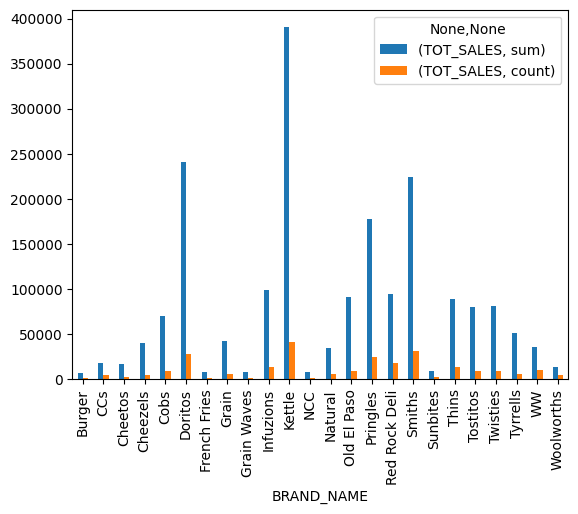

In [36]:
grouped_brand_bar.plot(kind="bar")

#### Display the comparison between the customers from different lifestages in a bar chart

In [37]:
grouped_lifestage_bar = merged_data[["LIFESTAGE","TOT_SALES"]].groupby("LIFESTAGE").agg({"TOT_SALES":['sum','count']})
grouped_lifestage_bar

TOT_SALES       
                              sum  count
LIFESTAGE                               
MIDAGE SINGLES/COUPLES  184751.30  25110
NEW FAMILIES             50433.45   6919
OLDER FAMILIES          352467.20  48594
OLDER SINGLES/COUPLES   402420.75  54478
RETIREES                366470.90  49763
YOUNG FAMILIES          316160.10  43592
YOUNG SINGLES/COUPLES   260405.30  36377

<Axes: xlabel='LIFESTAGE'>

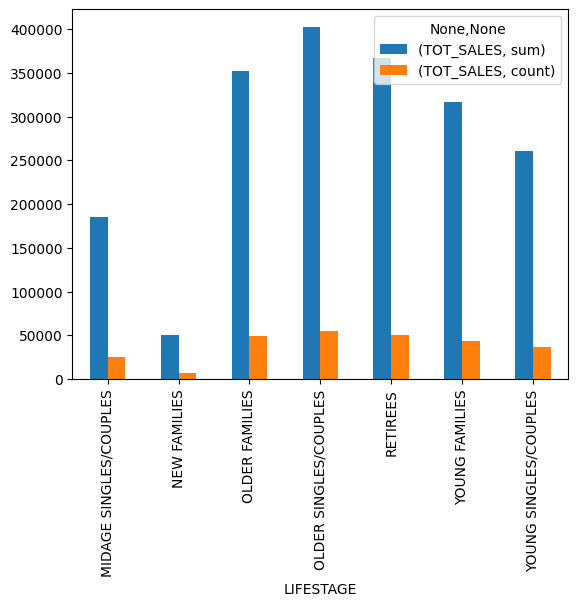

In [38]:
grouped_lifestage_bar.plot(kind="bar")